# Pymaceuticals Inc.
---

### Analysis

- Ramicane and Capomulin were the two best performing drug regimens for squamous cell carcinoma treatment in mice based on mean tumor volume. They each had a mean tumor volume below 41 mm3, while the other 8 drug regimens resulted in a mean tumor volume of above 52 mm3.

- Both Ramicane and Capomulin also had the highest number of observed timpoints for tumor measurement. Their success as a cancer treatment drug regimen could be indicated by the fact that individual mice were alive long enough to see future timepoint occurrences. On the opposite end of this spectrum, Propriva had the fewest number of observed mouse timpoints, and also has a fairly high mean tumor volume.

- The correlation coefficient calculated from the weight vs average tumor volume data for Capomulin treated mice is 0.84. This indicates a high correlation between weight of the mouse and average tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Reogranize the columns of the data table
organized_df = merged_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
organized_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [3]:
# checking the number of mice
mouse_count = organized_df["Mouse ID"].nunique()
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = organized_df[organized_df[["Mouse ID", "Timepoint"]].duplicated(keep=False)]
duplicate['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Assign duplicated mouse to variable should this need to change in future datasets
unique_mouse = duplicate['Mouse ID'].unique()[0]
unique_mouse

'g989'

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
organized_df[(organized_df["Mouse ID"] == unique_mouse)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = organized_df[organized_df['Mouse ID'] != unique_mouse]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [8]:
# Re-count the mice to ensure duplicate mouse has been dropped
mouse_count_2 = clean_df['Mouse ID'].nunique()
mouse_count_2

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_df = clean_df.groupby('Drug Regimen')

mean_tv = drug_df['Tumor Volume (mm3)'].mean()
median_tv = drug_df['Tumor Volume (mm3)'].median()
var_tv = drug_df['Tumor Volume (mm3)'].var()
stdev_tv = drug_df['Tumor Volume (mm3)'].std()
sem_tv = drug_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean Tumor Volume': mean_tv,
                          'Median Tumor Volume': median_tv,
                           'Tumor Volume Variance': var_tv,
                           'Tumor Volume Std. Dev.': stdev_tv,
                           'Tumor Volume Std. Err.': sem_tv})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
# Preparing the dataframe to be used for the bar chart by organizing in groupby and counting
time_regimen = clean_df.groupby('Drug Regimen')
count_time_regimen = time_regimen['Drug Regimen'].count()

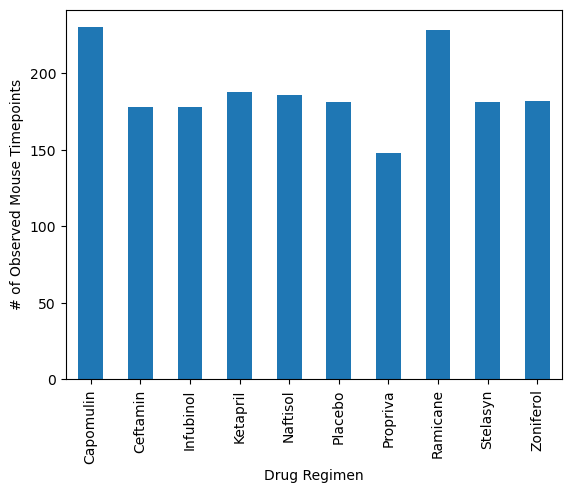

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_chart = count_time_regimen.plot(kind= 'bar')
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

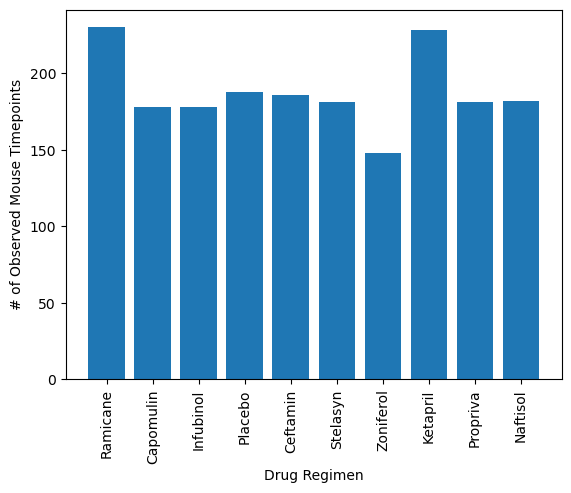

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(count_time_regimen))
y_axis = count_time_regimen
tick_locations = [x for x in x_axis]

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, clean_df['Drug Regimen'].unique(), rotation = 'vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

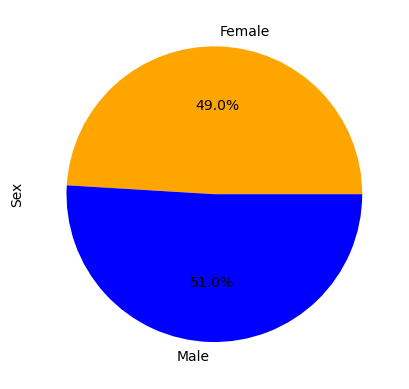

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_df.groupby('Sex')
count_mouse_sex = mouse_sex['Sex'].count()

colors = ['orange', 'blue']
count_mouse_sex.plot(kind='pie', colors=colors, autopct="%1.1f%%")
plt.show()

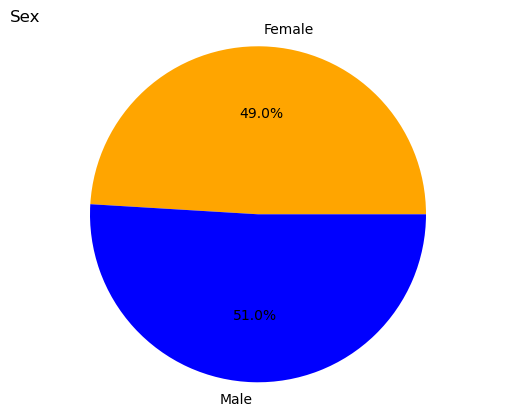

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
values = count_mouse_sex
colors = ['orange', 'blue']

plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Sex', loc='left')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_dict = {}
for index, row in clean_df.iterrows():
    mouse_id = row["Mouse ID"]
    timepoint = row["Timepoint"]
    if mouse_id in mouse_dict.keys():
        if timepoint > mouse_dict[mouse_id]["Timepoint"]:
            mouse_dict[mouse_id] = row
    else:
        mouse_dict[mouse_id] = row

fresh_df = pd.DataFrame()
for mouse, row in mouse_dict.items():
    fresh_df = pd.concat([fresh_df, row.to_frame().T])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merge_df = pd.merge(clean_df, fresh_df)
tumor_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,45,22.050126,1,Ramicane,Male,21,16
1,s185,45,23.343598,1,Capomulin,Female,3,17
2,x401,45,28.484033,0,Capomulin,Female,16,15
3,m601,45,28.430964,1,Capomulin,Male,22,17
4,g791,45,29.128472,1,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
243,z314,5,45.934712,0,Stelasyn,Female,21,28
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.74107,3,Naftisol,Female,13,29


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty dictionary to fill with tumor vol data (for plotting)
data = {'Capomulin': [],
       'Ramicane': [],
       'Infubinol': [],
       'Ceftamin': []}

# Loop through the treatment list and append final tumor volumes
for index, row in tumor_merge_df.iterrows():
    if row['Drug Regimen'] in data.keys():
        data[row['Drug Regimen']].append(row['Tumor Volume (mm3)'])
        
cap_data = pd.DataFrame(data['Capomulin'])
ram_data = pd.DataFrame(data['Ramicane'])
inf_data = pd.DataFrame(data['Infubinol'])
cef_data = pd.DataFrame(data['Ceftamin'])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_dict = data

drug_dataframes = {}
for key, value in drug_dict.items():
    data_frame = pd.DataFrame(data[key])
    drug_dataframes[key] = data_frame
    quartiles = data_frame.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0][0.25]
    upperq = quartiles[0][0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print statements indicating if there are any potential outliers
    print(f"{key}'s potential outliers are data points above {upper_bound} and below {lower_bound}.")
    

Capomulin's potential outliers are data points above 51.83201549 and below 20.70456164999999.
Ramicane's potential outliers are data points above 54.30681135 and below 17.912664470000003.
Infubinol's potential outliers are data points above 82.74144559000001 and below 36.83290494999999.
Ceftamin's potential outliers are data points above 87.66645829999999 and below 25.355449580000002.


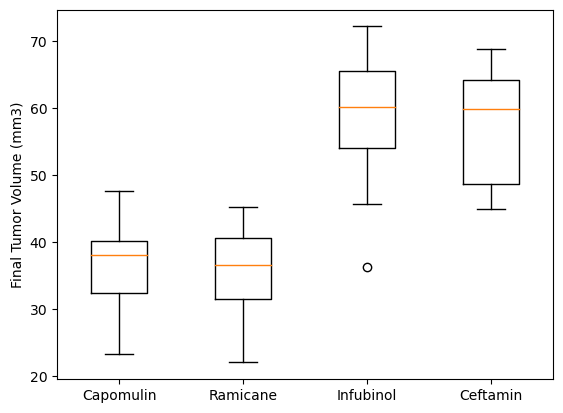

In [18]:
# # Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
combined_dfs = pd.DataFrame({'Capomulin': drug_dataframes["Capomulin"][0],
                             'Ramicane': drug_dataframes["Ramicane"][0],
                             'Infubinol': drug_dataframes["Infubinol"][0],
                             'Ceftamin': drug_dataframes["Ceftamin"][0]})

fig1, ax1 = plt.subplots()
ax1.boxplot(combined_dfs)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(combined_dfs.keys())

plt.show()

# Line and Scatter Plots

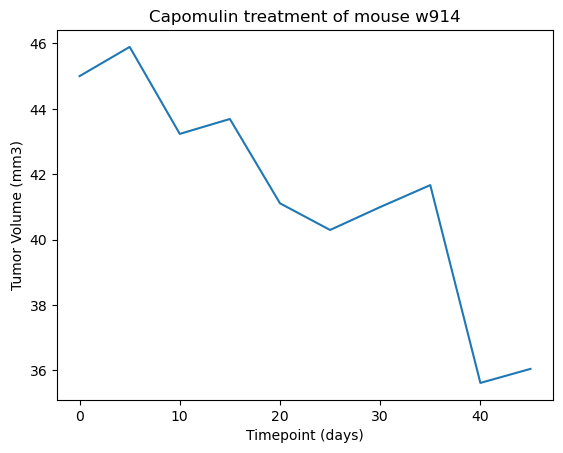

In [19]:
# Generate a line plot of tumor volume vs. time point for a single 
# mouse treated with Capomulin

# Selection of a single mouse to use for the graphs
target_mouse = clean_df.loc[clean_df['Mouse ID'] == 'w914']
x_axis = target_mouse['Timepoint']
y_axis = target_mouse['Tumor Volume (mm3)']

# Line graph creation, labeling, and parameters
plt.plot(x_axis, y_axis)
plt.title('Capomulin treatment of mouse w914')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

/var/folders/1r/yl3yfny158j94kx731yl4khw0000gn/T/ipykernel_1277/910743184.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_avg = cap_mice.groupby(['Mouse ID']).mean()


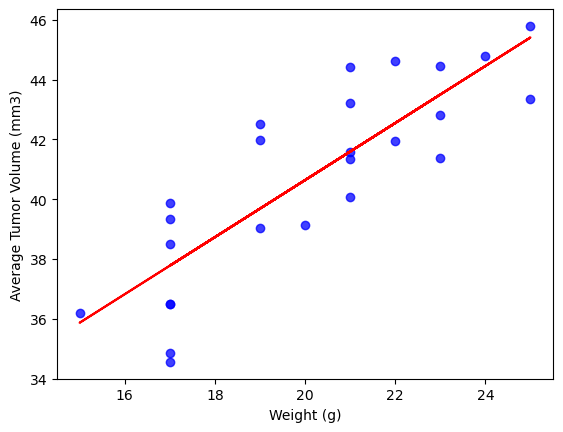

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Group the previous dataframe and average the data collected per mouse
cap_avg = cap_mice.groupby(['Mouse ID']).mean()

x_axis = cap_avg['Weight (g)']
y_axis = cap_avg['Tumor Volume (mm3)']

# Calculate the linear regression model to be displayed on the scatter plot
slope, intercept, r, p, se = st.linregress(x_axis, y_axis)
result = st.linregress(x_axis, y_axis)

# Scatter plot creation, labeling, and parameters
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', alpha=0.75)
plt.plot(x_axis, result.intercept + result.slope*x_axis, 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


# Correlation and Regression

In [67]:
# Calculate the correlation coefficient for mouse weight and average observed tumor volume 
# for the entire Capomulin regimen
corr = round(st.pearsonr(x_axis, y_axis)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}.")


The correlation between mouse weight and the average tumor volume is 0.84.
